# São Paulo Road Network Analysis

**Pedro Borges** — pedro.borges@inpe.br

Geospatial network analysis of the road infrastructure in the City of São Paulo. This notebook presents the results of the analysis pipeline, including global network statistics, node/edge-level parameters, and spatial aggregations by OD zone, district, and subprefecture.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import re
from pathlib import Path

plt.rcParams.update({
    "figure.facecolor": "#1a1a2e",
    "axes.facecolor": "#1a1a2e",
    "text.color": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
})

DATA_DIR = Path("data/output")
CRS_WEB_MERCATOR = "EPSG:3857"
BASEMAP = ctx.providers.CartoDB.DarkMatter


def plot_choropleth(gdf, column, title, geom_type="polygon",
                    cmap="plasma", figsize=(12, 10), **kwargs):
    """Plot a choropleth map with a dark basemap."""
    fig, ax = plt.subplots(figsize=figsize)

    plot_kwargs = dict(column=column, cmap=cmap, legend=True,
                       legend_kwds={"shrink": 0.6, "label": column})

    if geom_type == "point":
        plot_kwargs.update(markersize=0.1, alpha=0.6)
    elif geom_type == "line":
        plot_kwargs.update(linewidth=0.15)
    else:
        plot_kwargs.update(alpha=0.7, edgecolor="white", linewidth=0.3)

    plot_kwargs.update(kwargs)
    gdf.plot(ax=ax, **plot_kwargs)

    ctx.add_basemap(ax, source=BASEMAP)
    ax.grid(True, alpha=0.3, color="white", linestyle="--")
    ax.set_axis_off()
    ax.set_title(title, fontsize=14, color="white", pad=12)
    plt.tight_layout()
    plt.show()

## Global Network Parameters

In [2]:
text = (DATA_DIR / "results.txt").read_text()

params = {}
for line in text.splitlines():
    match = re.match(r"^(.+?):\s+([\d.]+)", line.strip())
    if match:
        params[match.group(1).strip()] = match.group(2)

df_params = pd.DataFrame(
    list(params.items()), columns=["Parameter", "Value"]
)
df_params

Parameter       Value
0                       Number of nodes (N)      122456
1                       Number of edges (L)      304027
2                      Average degree (<k>)      4.9655
3      Average clustering coefficient (<c>)      0.0596
4     Average Euclidean distance (<l_eucl>)     92.0898
5     Average Manhattan distance (<l_manh>)    117.0374
6        Average physical length (<length>)     96.9404
7                       Topological (edges)    114.3566
8                       Physical length (m)  23144.3021
9                    Euclidean distance (m)  22754.0413
10                   Manhattan distance (m)  28499.9732
11  Maximum Euclidean distance (max_l_eucl)   6540.5646
12  Maximum Manhattan distance (max_l_manh)   8611.8547
13     Maximum physical length (max_length)   6833.8703
14                             Diameter (D)         357
15                          p = 2L / N(N-1)    0.000041
16                              k* = p(N-1)      4.9655
17                                c* = k*/N    0.000041
18                          l* = logN/logk*      7.3107

## Node Parameters

- **k_i** — Node degree: number of edges connected to each node
- **b_i** — Node betweenness centrality: fraction of shortest paths passing through each node
- **c_i** — Clustering coefficient: fraction of a node's neighbors that are also neighbors of each other

In [3]:
nodes = gpd.read_file(DATA_DIR / "nodes.gpkg").to_crs(CRS_WEB_MERCATOR)
nodes[["k_i", "c_i", "b_i", "avg_l_i"]].describe()

k_i            c_i            b_i        avg_l_i
count  122456.000000  122456.000000  122456.000000  122456.000000
mean        4.965490       0.059641       0.001071      95.989565
std         1.709278       0.127200       0.006706      90.543756
min         1.000000       0.000000       0.000000       0.000000
25%         4.000000       0.000000       0.000020      54.346951
50%         6.000000       0.000000       0.000078      82.972008
75%         6.000000       0.000000       0.000329     116.270134
max        11.000000       1.000000       0.202894    6833.870270

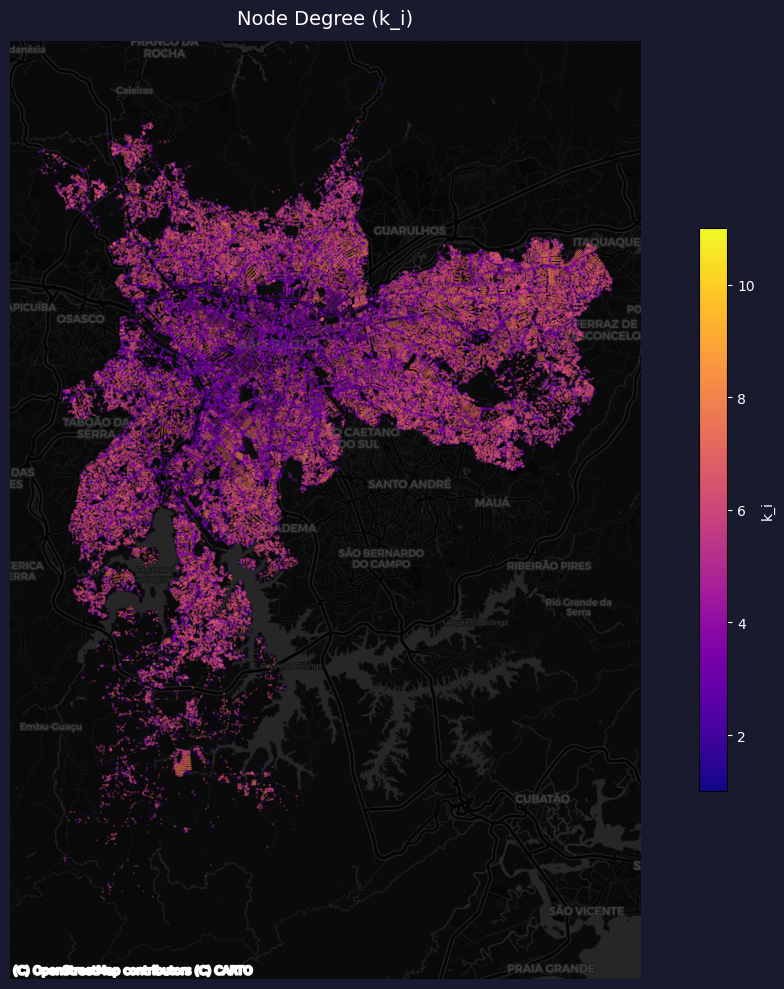

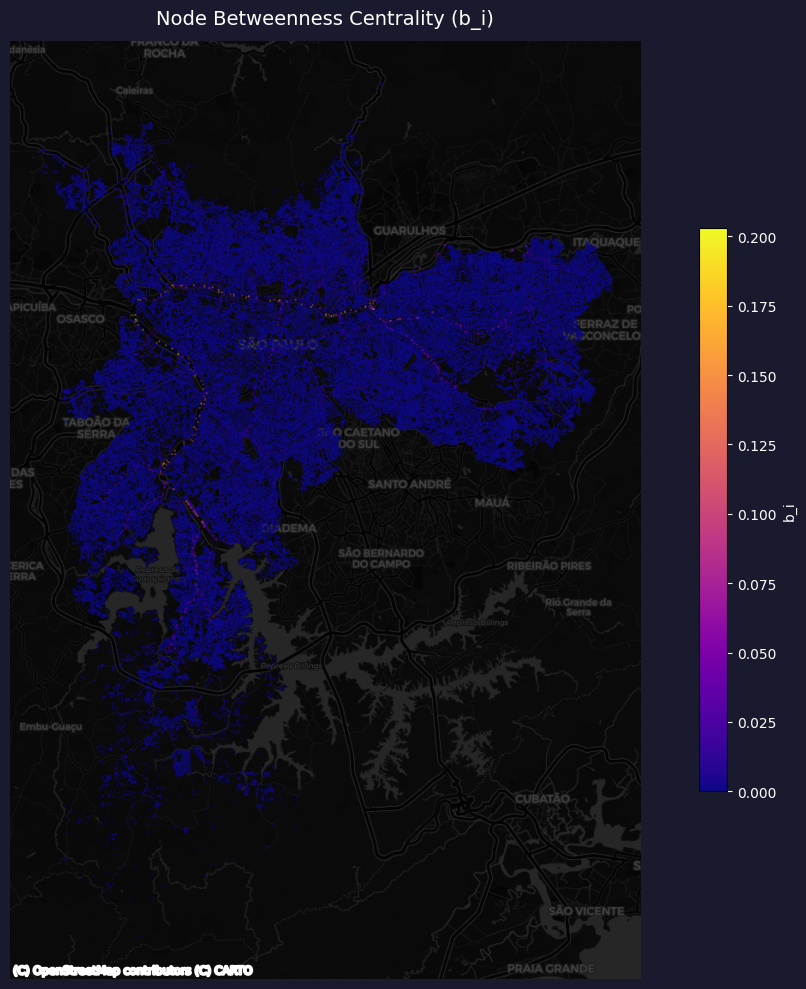

In [4]:
plot_choropleth(nodes, "k_i", "Node Degree (k_i)", geom_type="point")
plot_choropleth(nodes, "b_i", "Node Betweenness Centrality (b_i)", geom_type="point")

## Edge Parameters

- **e_ij** — Edge betweenness centrality: fraction of shortest paths passing through each edge

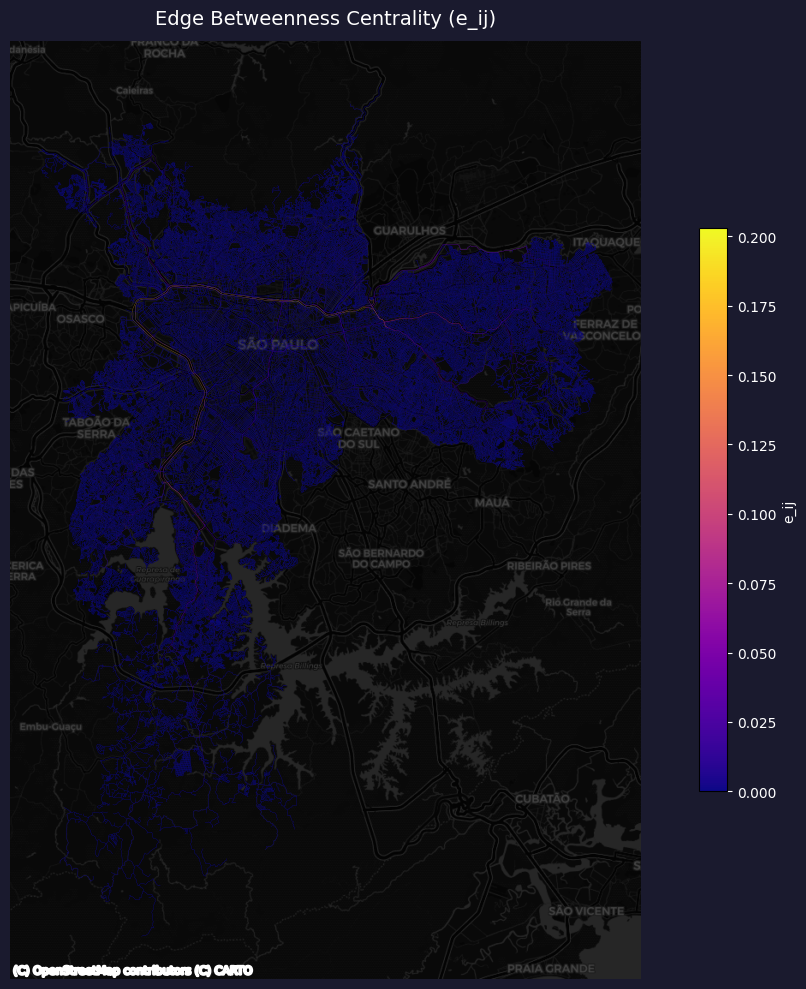

In [5]:
edges = gpd.read_file(DATA_DIR / "edges.gpkg").to_crs(CRS_WEB_MERCATOR)
plot_choropleth(edges, "e_ij", "Edge Betweenness Centrality (e_ij)", geom_type="line")

## Aggregated Parameters by OD Zone

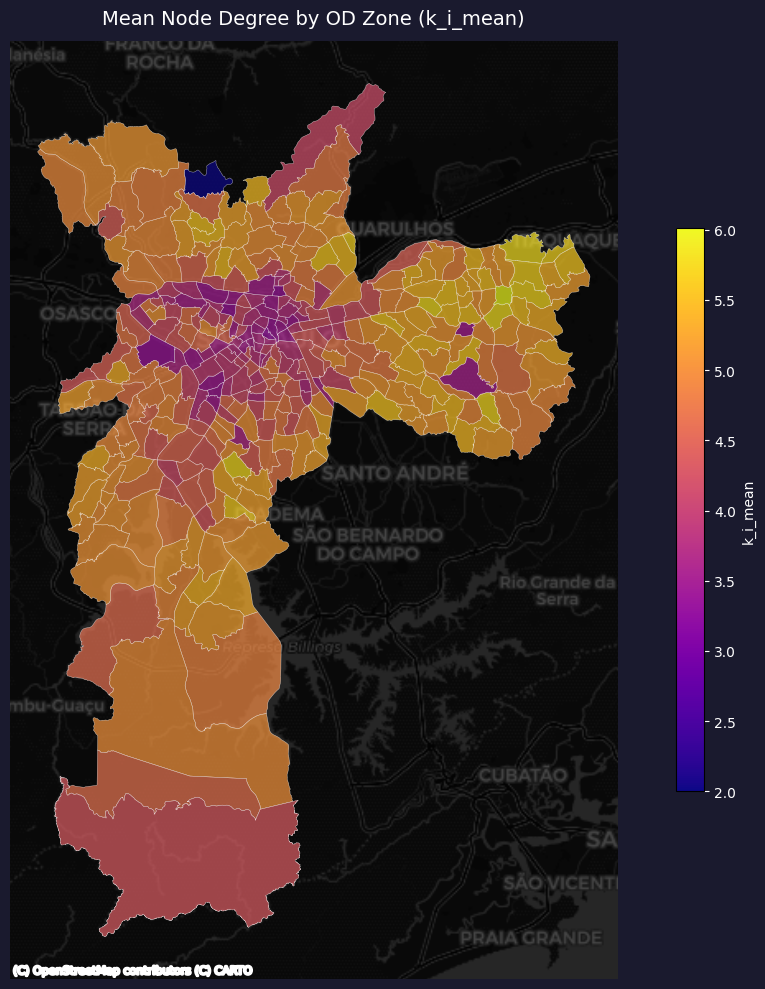

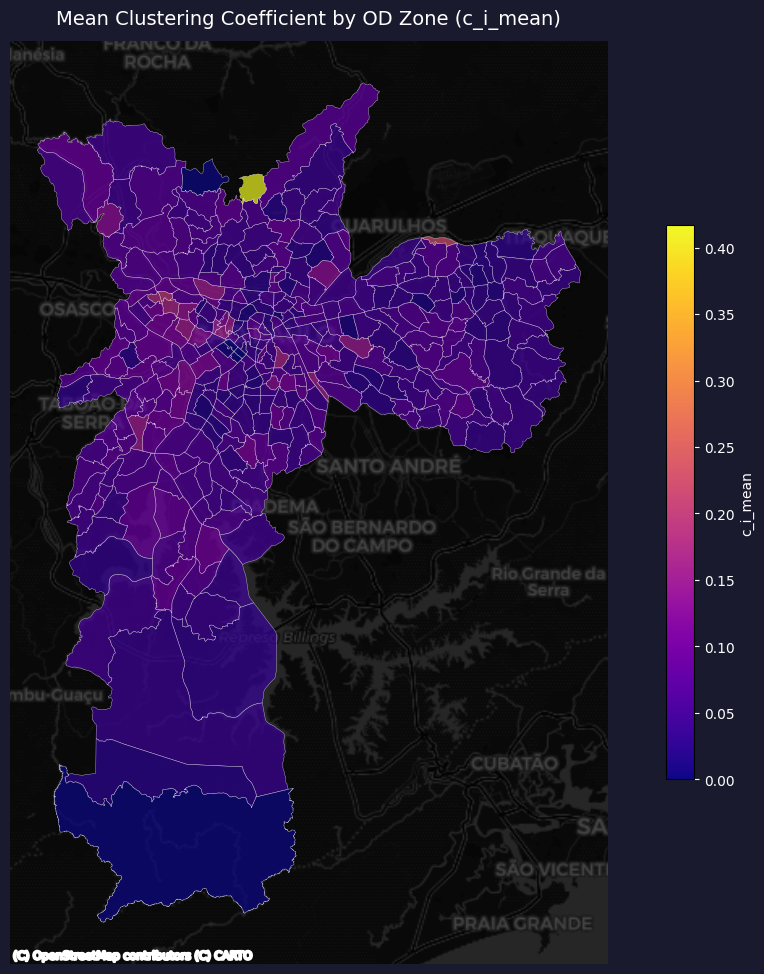

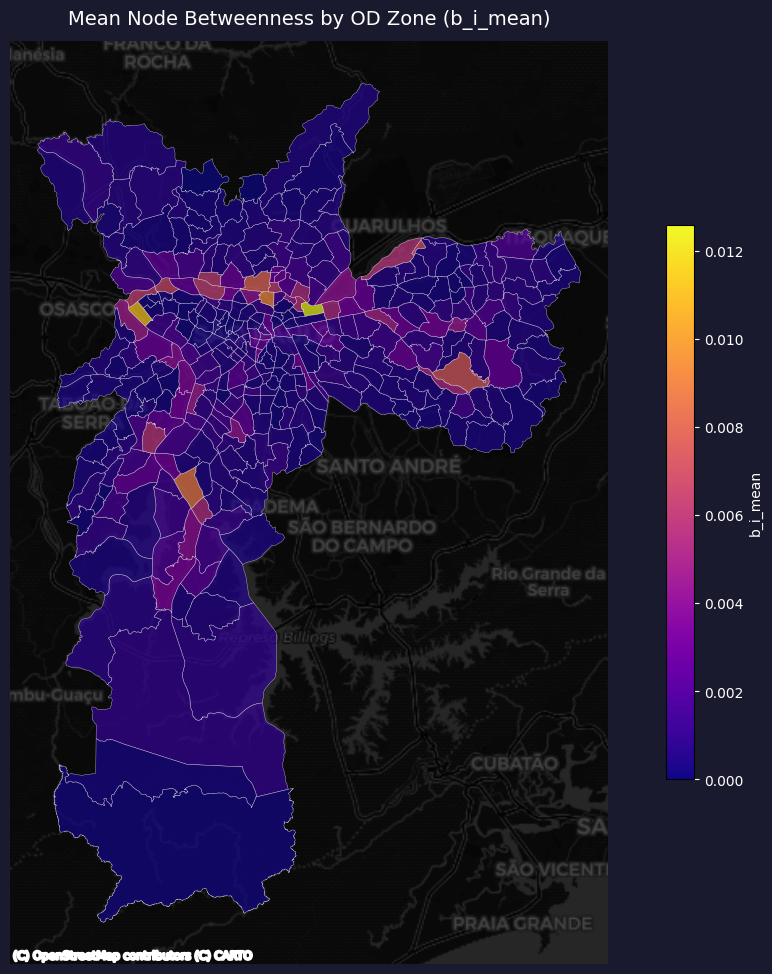

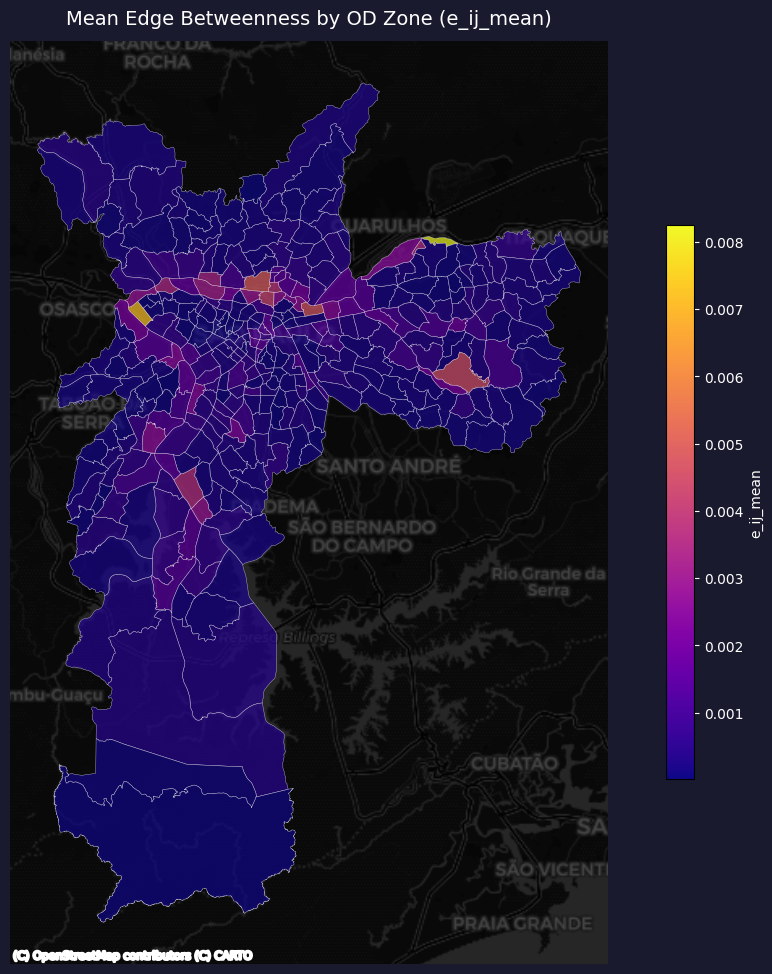

In [6]:
zones = gpd.read_file(DATA_DIR / "zone_summary.gpkg").to_crs(CRS_WEB_MERCATOR)
plot_choropleth(zones, "k_i_mean", "Mean Node Degree by OD Zone (k_i_mean)")
plot_choropleth(zones, "c_i_mean", "Mean Clustering Coefficient by OD Zone (c_i_mean)")
plot_choropleth(zones, "b_i_mean", "Mean Node Betweenness by OD Zone (b_i_mean)")
plot_choropleth(zones, "e_ij_mean", "Mean Edge Betweenness by OD Zone (e_ij_mean)")

## Aggregated Parameters by District

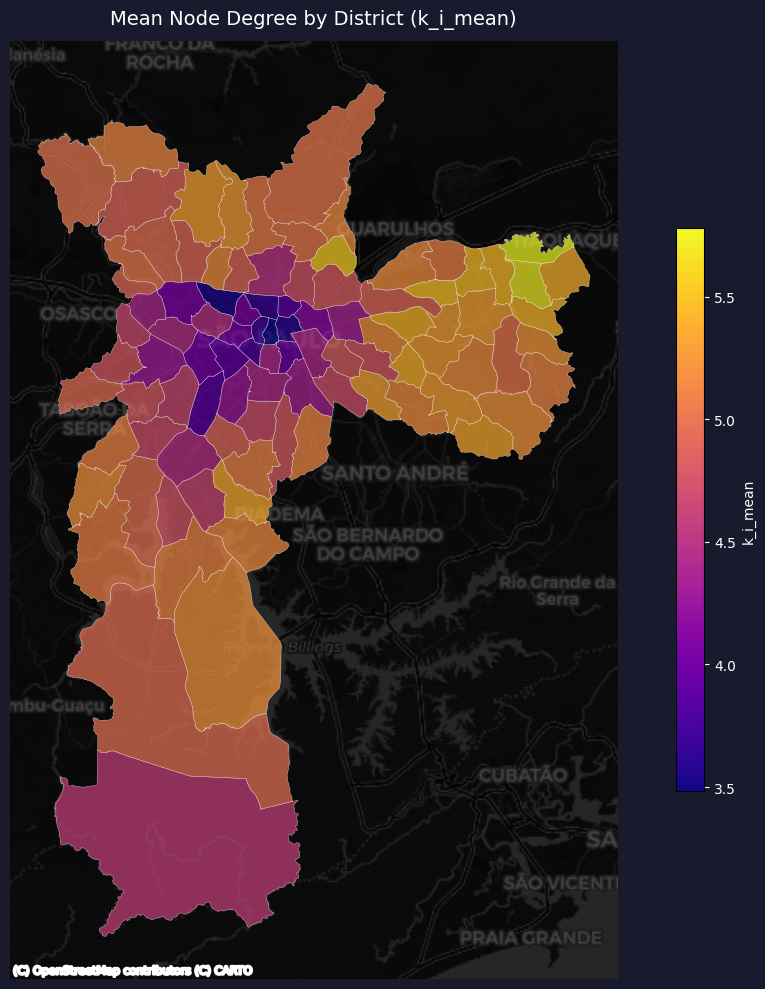

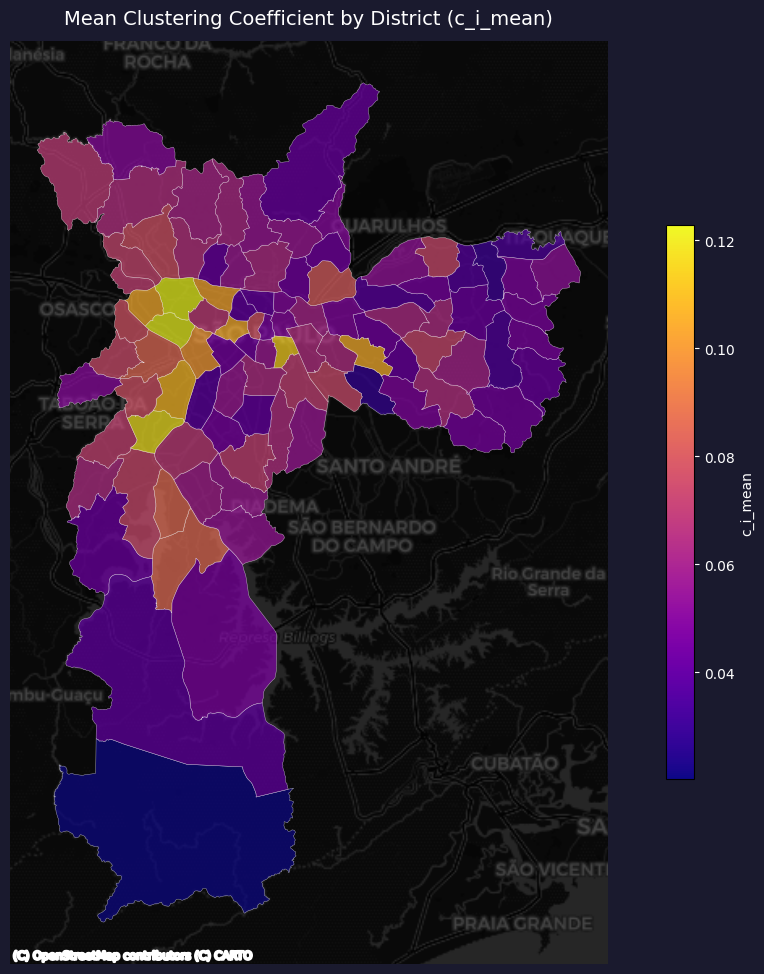

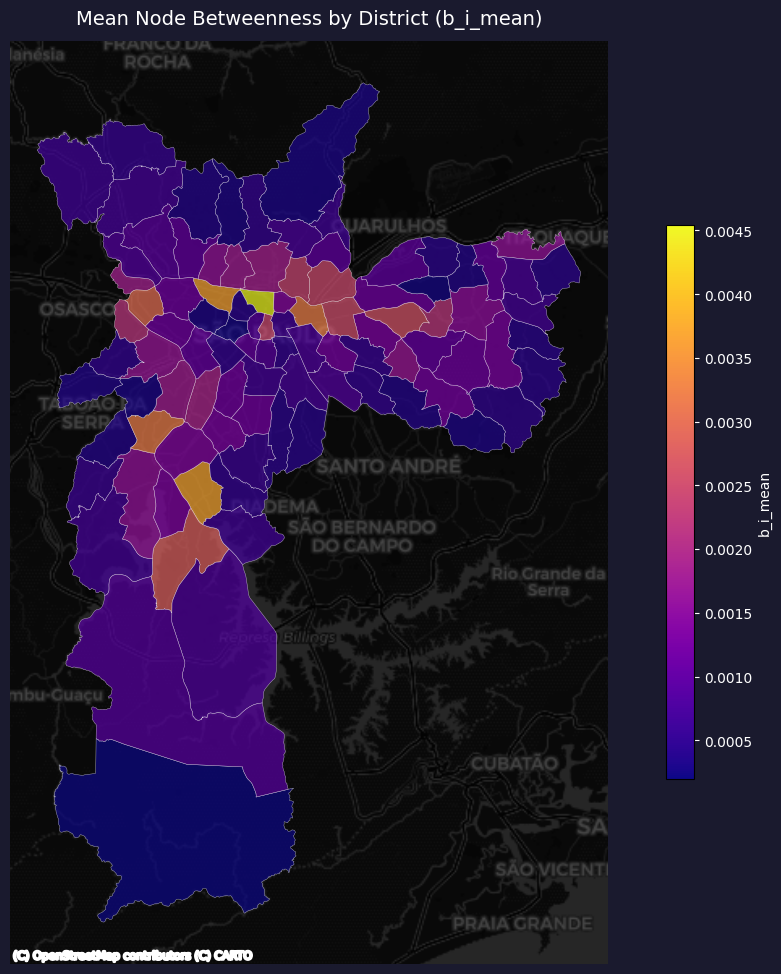

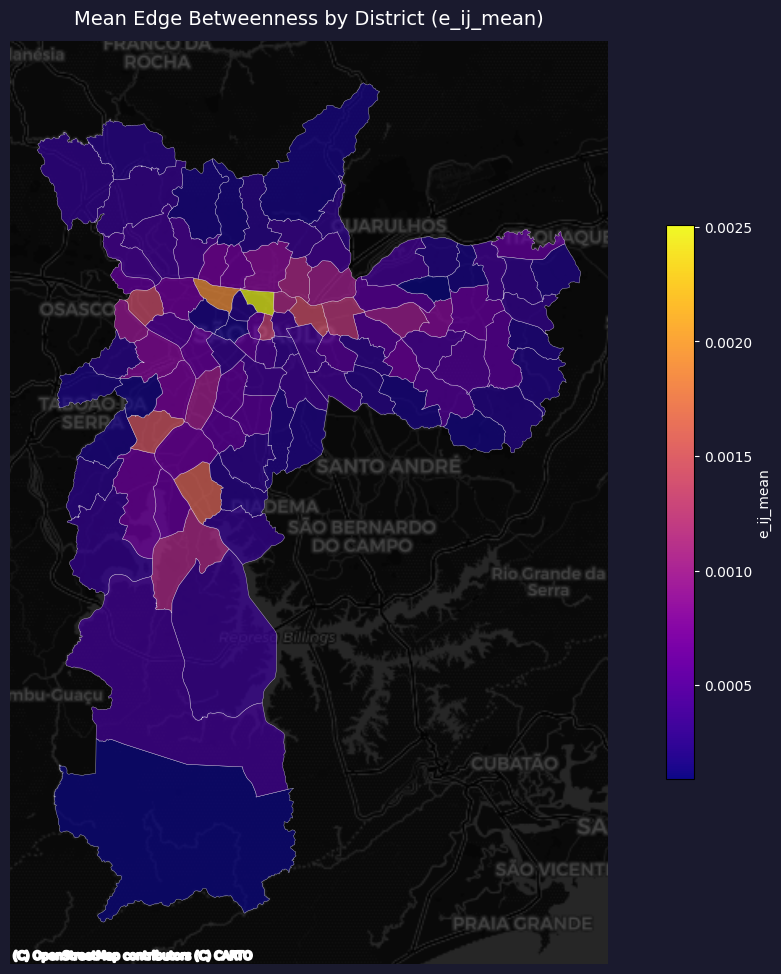

In [7]:
districts = gpd.read_file(DATA_DIR / "district_summary.gpkg").to_crs(CRS_WEB_MERCATOR)
plot_choropleth(districts, "k_i_mean", "Mean Node Degree by District (k_i_mean)")
plot_choropleth(districts, "c_i_mean", "Mean Clustering Coefficient by District (c_i_mean)")
plot_choropleth(districts, "b_i_mean", "Mean Node Betweenness by District (b_i_mean)")
plot_choropleth(districts, "e_ij_mean", "Mean Edge Betweenness by District (e_ij_mean)")

## Aggregated Parameters by Subprefecture

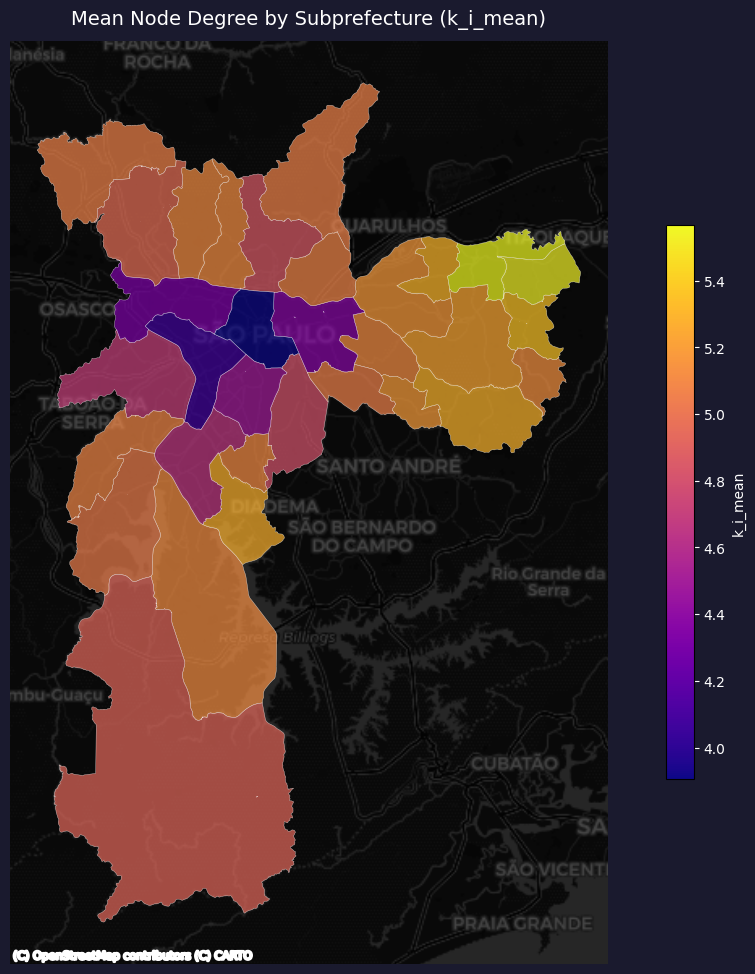

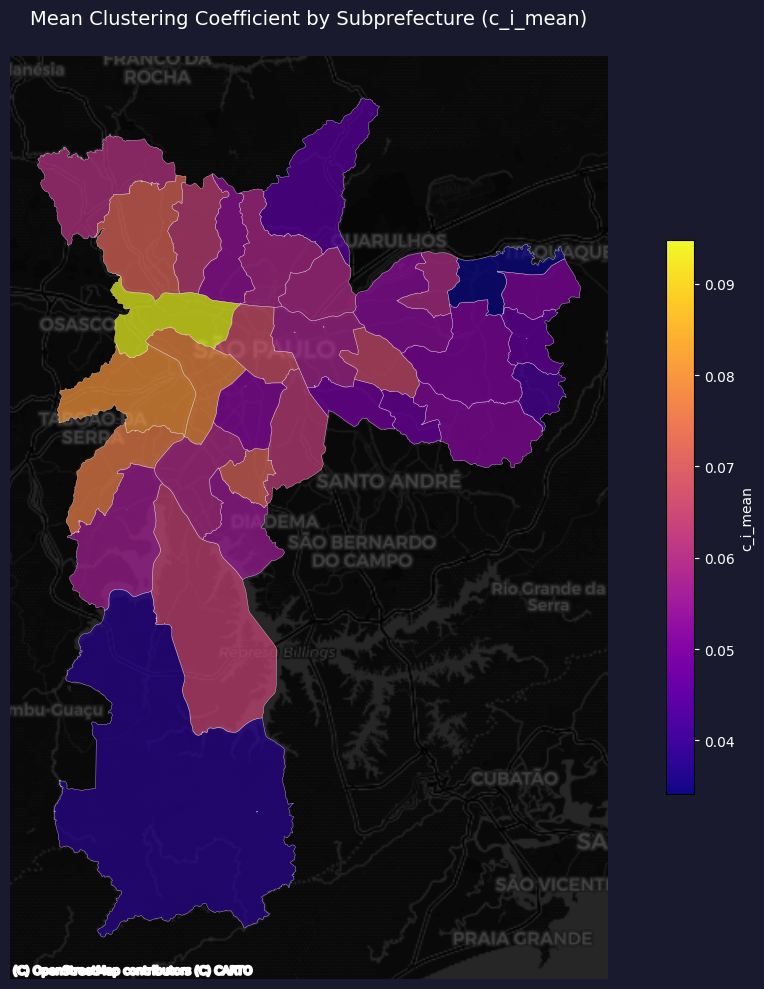

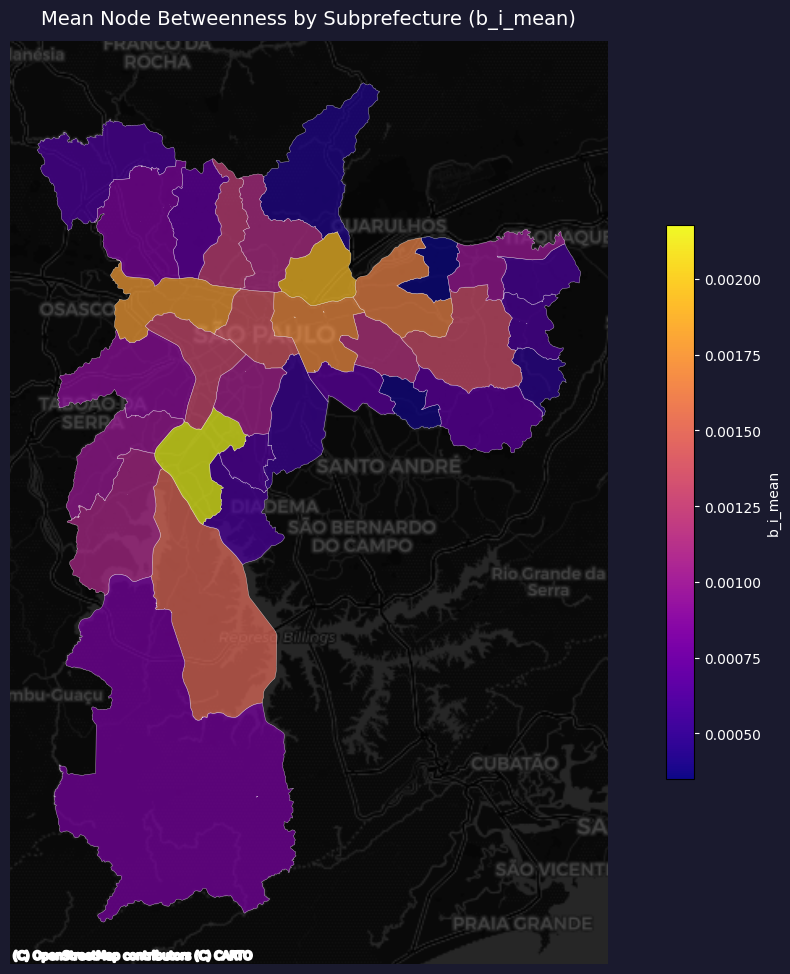

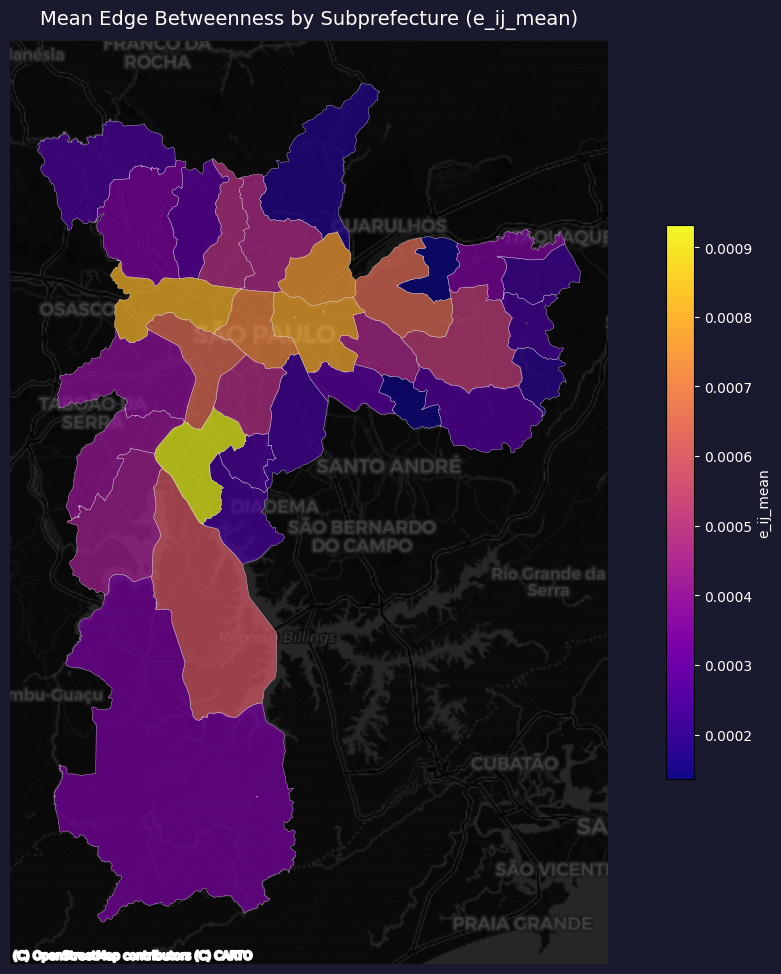

In [8]:
subpref = gpd.read_file(DATA_DIR / "subprefeitura_summary.gpkg").to_crs(CRS_WEB_MERCATOR)
plot_choropleth(subpref, "k_i_mean", "Mean Node Degree by Subprefecture (k_i_mean)")
plot_choropleth(subpref, "c_i_mean", "Mean Clustering Coefficient by Subprefecture (c_i_mean)")
plot_choropleth(subpref, "b_i_mean", "Mean Node Betweenness by Subprefecture (b_i_mean)")
plot_choropleth(subpref, "e_ij_mean", "Mean Edge Betweenness by Subprefecture (e_ij_mean)")